In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint # ordinal differential equation integrator

In [50]:
# population
i_start = 0.1
s_start = 1 - i_start
r_start = 0
x0 = (s_start, i_start, r_start)

# epidemicals
t_infection = 5
t_recovery = 20

beta = 1 / t_infection
gamma = 1 / t_recovery

R0 = beta/gamma

In [51]:
def derivatives(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i 
    didt = beta * s * i - gamma * i
    drdt = gamma * i 
    return (dsdt, didt, drdt)

# t_1: 90% in S, 10% in I, 0% in R
# t_2: 87% in S, 11% in I, 2% in R
# t_3: 84.6% in S, 12.3% in I, 4.1% in R


In [54]:
t = np.linspace(0, 100, 100)
integral = odeint(derivatives, x0, t, args=(beta, gamma))
s, i, r = integral.T

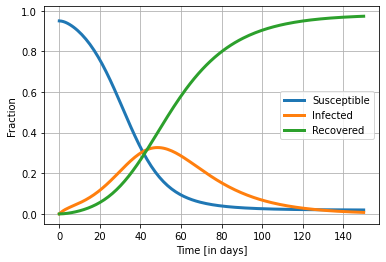

In [106]:
plt.plot(t, s, lw=3, label="Susceptible")
plt.plot(t, i, lw=3, label="Infected")
plt.plot(t, r, lw=3, label="Recovered")
plt.grid(True)
plt.legend()
plt.xlabel("Time [in days]")
plt.ylabel("Fraction")
plt.savefig("sir_example.pdf")

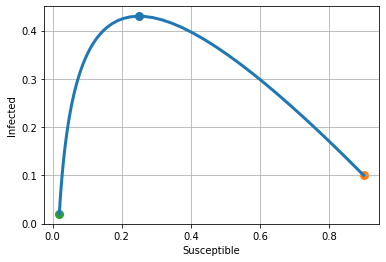

In [71]:
plt.plot(s, i, lw=3)
plt.scatter(1/R0, max(i), lw=3)
plt.scatter(s[0], i[0], lw=3)
plt.scatter(s[-1], i[-1], lw=3)

plt.xlabel("Susceptible")
plt.ylabel("Infected")
plt.grid(True)


In [97]:
# SEIR Model
# population
e_start = 0.05
i_start = 0
r_start = 0
s_start = 1 - e_start - i_start - r_start
x0 = (s_start, e_start, i_start, r_start)

# epidemicals
t_recovery = 20
t_incubation = 5

R0 = 4

alpha = 1 / t_incubation
gamma = 1 / t_recovery
beta = R0 * gamma

In [98]:
def derivatives(x, t, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -beta * s * i
    dedt = beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt = gamma * i
    return (dsdt, dedt, didt, drdt)

Text(0, 0.5, 'Fraction')

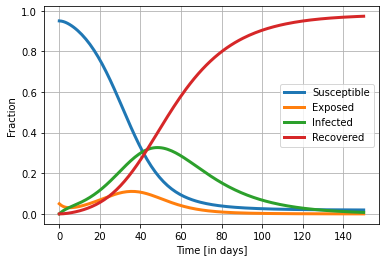

In [103]:
t = np.linspace(0, 150, 150)
integral = odeint(derivatives, x0, t, args=(alpha, beta, gamma))
s, e, i, r = integral.T

plt.plot(t, s, lw=3, label="Susceptible")
plt.plot(t, e, lw=3, label="Exposed")
plt.plot(t, i, lw=3, label="Infected")
plt.plot(t, r, lw=3, label="Recovered")
plt.grid(True)
plt.legend()
plt.xlabel("Time [in days]")
plt.ylabel("Fraction")

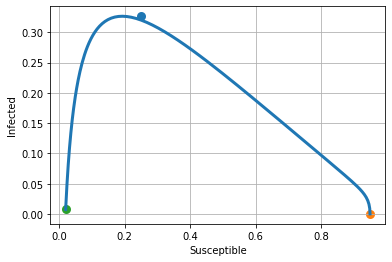

In [104]:
plt.plot(s, i, lw=3)
plt.scatter(1/R0, max(i), lw=3)
plt.scatter(s[0], i[0], lw=3)
plt.scatter(s[-1], i[-1], lw=3)

plt.xlabel("Susceptible")
plt.ylabel("Infected")
plt.grid(True)